<a href="https://colab.research.google.com/github/AnaRaquelCafe/PredizendoEvasaoFaculdade/blob/main/Conhecendo_algoritmos_de_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predizendo a evasão de estudantes e sucesso acadêmico 🎓

### Sobre a base de dados 🎲

Um conjunto de dados criado a partir de uma instituição de ensino superior (adquirido de várias bases de dados disjuntas) relacionado a alunos matriculados em diferentes cursos de graduação, como **agronomia, design, educação, enfermagem, jornalismo, administração, serviço social e tecnologias**.

O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno (percurso acadêmico, demografia e fatores socioeconômicos) e o desempenho acadêmico do aluno no final do primeiro e segundo semestres.

### Nossos objetivos 🚀

O conjunto de dados foi criado no âmbito de um projeto que visa contribuir para a redução do abandono e insucesso académico no ensino superior, através da utilização de técnicas de aprendizagem automática para identificar alunos em risco numa fase inicial do seu percurso académico, de modo a que estratégias de apoio aos mesmos possam ser postas em prática. O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno, trajetória acadêmica, demografia e fatores socioeconômicos. O problema é formulado como uma tarefa de classificação de três categorias (abandono, matriculado e graduado) ao final da duração normal do curso.

- Criar modelos preditivos de classificação 🎯
- Criar modelos preditivos de clusterização 🧩


### Sobre a fonte de dados:

Este conjunto de dados é apoiado pelo programa SATDAP - Capacitação da Administração Pública ao abrigo da bolsa POCI-05-5762-FSE-000191, Portugal.

## Analisando a qualidade dos dados 🧹🎲

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [44]:
pd.set_option('display.max_columns', None) # Para mostrar todas as colunas
df = pd.read_excel("StudentsPrepared.xlsx")
df.head()

,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,Solteiro,Design de Animação e Multimédia,Ensino Secundário,122.0,Português,127.3,0,0,1,Masculino,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
1,Solteiro,Turismo,Ensino Secundário,160.0,Português,142.5,0,0,0,Masculino,0,0,0,6,6,6,1.400000e+01,0,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduado
2,Solteiro,Design de Comunicação,Ensino Secundário,122.0,Português,124.8,0,0,0,Masculino,0,0,0,6,0,0,0.000000e+00,0,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
3,Solteiro,Jornalismo e Comunicação,Ensino Secundário,122.0,Português,119.6,0,0,1,Feminino,0,0,0,6,8,6,1.342857e+16,0,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduado
4,Casado,Serviço Social (prestação nocturna),Ensino Secundário,100.0,Português,141.5,0,0,1,Feminino,0,0,0,6,9,5,1.233333e+16,0,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduado


In [45]:
df.shape

(4424, 28)

In [46]:
df.isnull().sum()

EstadoCivil                                   0
Curso                                         0
QualificacaoAnterior                          0
QualificacaoAnteriorGrau                      0
Nacionalidade                                 0
NotaAdmissao                                  0
NecessidadesEspeciais                         0
Devedor                                       0
MensalidadesEmDia                             0
Genero                                        0
Bolsista                                      0
International                                 0
UnidadesCurriculares1SemestreCreditado        0
UnidadesCurriculares1SemestreInscrito         0
UnidadesCurriculares1SemestreAvaliacoes       0
UnidadesCurriculares1SemestreAprovado         0
UnidadesCurriculares1SemestreGrau             0
UnidadesCurriculares1SemestreSemAvaliacoes    0
UnidadesCurriculares2SemestreCreditado        0
UnidadesCurriculares2SemestreInscrito         0
UnidadesCurriculares2SemestreAvaliacoes 

### **Conhecendo os dados** 👋

Um passo muito importante no pipeline da construção de um modelo de aprendizado de máquina é conhecer os dados.

**Como conhecemos os dados?**

Claro que a análise exploratória dos dados pode ser uma ótima primeira largada! Nesta etapa **construímos gráficos**, **testamos hipóteses** e **validamos os dados** com a área de negócio.

Como o foco dessa aula não é a análise exploratória, vamos pular essa etapa para focar nos modelos preditivos. Mas não se esqueça que essa etapa é primordial para seu projeto, ok?

###  **Modelos supervisionados** 🎯

Os modelos supervisionados são modelos que trabalham com bases de dados rotuladas, ou seja, temos features características que são indenpendentes e a target, nossa variável alvo.

Próximo passo, vamos entender o **equilíbrio da base de dados**.



---


Quando estamos construindo um modelo de aprendizado de máquina, a análise do equilíbrio de classes é muito importante para manter as amostras de cada target de forma **representativa** durante o treinamento dos dados, ou seja, devemos garantir que cada tipo de categoria da variável target tenha a mesma representatividade em volume de dados durante o treinamento do algoritmo.

Vamos plotar um gráfico de barras para entender as proporções:

In [47]:
set(df['Target'])

{'Desistente', 'Graduado', 'Matriculado'}

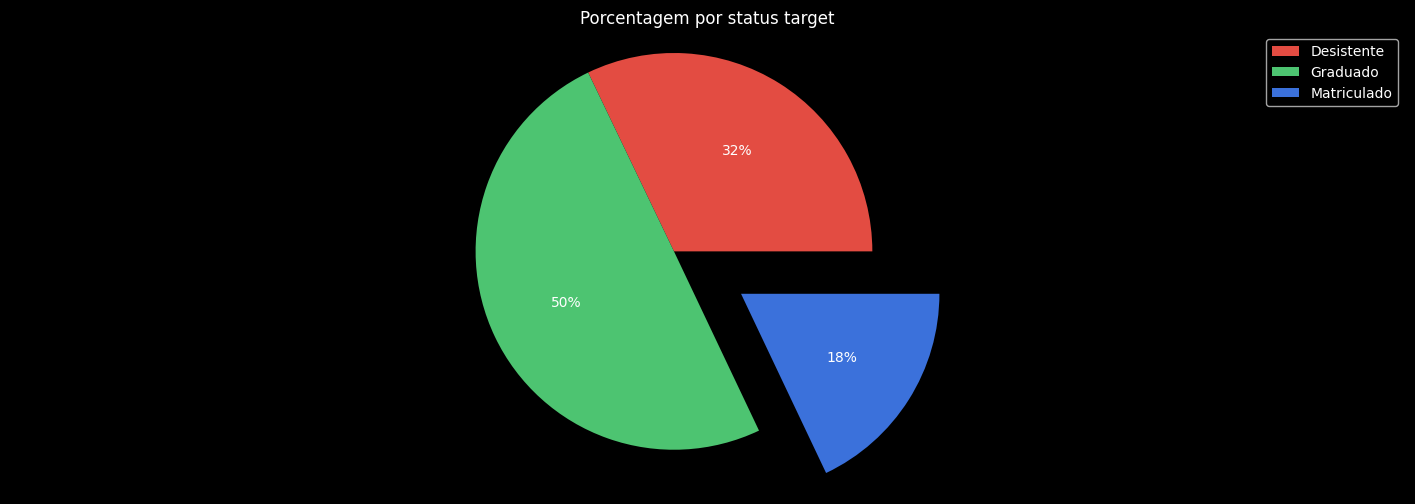

In [48]:
#Calcular o total de alunos(as) por tipo de status
df_targets_percent = df.groupby('Target')['Target'].count()

# Calculando a proporção de estudantes por categporia
total_estudantes = len(df)
df_target_porcentagem = df_targets_percent / total_estudantes * 100

#Separando os valores e nomes em uma lista, para deixar o gráfico mais apresentável
labels = df_target_porcentagem.index.tolist()
sizes = df_target_porcentagem.values.tolist()

#Criando o gráfico
plt.style.use('dark_background')
figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, autopct='%1.0f%%', colors=[ '#e34c42','#4dc471','#3b71db'], labeldistance = 1.1,
           explode=[0, 0, .4])
grafico.axis('equal')
plt.title('Porcentagem por status target')
plt.legend(labels, loc='best')
plt.show()

OK, podemos concluir aqui que 50% da base contém estudantes graduados e 32% de estudantes evadidos, os demais 18% são estudantes ainda matriculados e ativos.

### **Preparando os dados para colocar no algoritmo** 📊🔨

In [49]:
df.head()

,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,Solteiro,Design de Animação e Multimédia,Ensino Secundário,122.0,Português,127.3,0,0,1,Masculino,0,0,0,0,0,0,0.000000e+00,0,0,0,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
1,Solteiro,Turismo,Ensino Secundário,160.0,Português,142.5,0,0,0,Masculino,0,0,0,6,6,6,1.400000e+01,0,0,6,6,6,1.366667e+16,0,13.9,-0.3,0.79,Graduado
2,Solteiro,Design de Comunicação,Ensino Secundário,122.0,Português,124.8,0,0,0,Masculino,0,0,0,6,0,0,0.000000e+00,0,0,6,0,0,0.000000e+00,0,10.8,1.4,1.74,Desistente
3,Solteiro,Jornalismo e Comunicação,Ensino Secundário,122.0,Português,119.6,0,0,1,Feminino,0,0,0,6,8,6,1.342857e+16,0,0,6,10,5,1.240000e+01,0,9.4,-0.8,-3.12,Graduado
4,Casado,Serviço Social (prestação nocturna),Ensino Secundário,100.0,Português,141.5,0,0,1,Feminino,0,0,0,6,9,5,1.233333e+16,0,0,6,6,6,1.300000e+01,0,13.9,-0.3,0.79,Graduado


Será que precisamos trabalhar com os estudantes matriculados?

In [50]:
df_evadidos = df[df['Target'] == 'Desistente']
df_matriculados = df[df['Target'] == 'Matriculado']
df_graduados = df[df['Target'] == 'Graduado']

df_concatenado = pd.concat([df_evadidos, df_graduados])

set(df_concatenado['Target'])

{'Desistente', 'Graduado'}

## Validando o equilíbrio das targets 🎯

Por que é importante validar a proporção das targets no modelo?

In [51]:
round(df_concatenado['Target'].value_counts(normalize = True)*100,2)

Target
Graduado      60.85
Desistente    39.15
Name: proportion, dtype: float64

Como podemos observar, a base de dados possui maior concentração de amostras para os estudantes graduados, o que pode ser um comportamento natural em faculdades, mas será que este problema de desequilíbrio pode afetar o aprendizado de máquina? Claramente, sim! O desequilíbrio de classes é um problema muito comum neste mundo de aprendizado de máquina e pode ser tratado de vários jeitos:

* Coleta de mais amostras das classes minoritárias.
* Aplicação de técnica de oversampling.

Neste notebook, vamos trabalhar com a segunda opção.

### Tratando os dados categóricos 🅰️

**LabelEncoder:** Essa classe é utilizada para **codificar rótulos de classes em números inteiros**. É frequentemente usado quando se trabalha com algoritmos de aprendizado supervisionado que requerem rótulos numéricos.

In [52]:
df_concatenado.head()

,EstadoCivil,Curso,QualificacaoAnterior,QualificacaoAnteriorGrau,Nacionalidade,NotaAdmissao,NecessidadesEspeciais,Devedor,MensalidadesEmDia,Genero,Bolsista,International,UnidadesCurriculares1SemestreCreditado,UnidadesCurriculares1SemestreInscrito,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreGrau,UnidadesCurriculares1SemestreSemAvaliacoes,UnidadesCurriculares2SemestreCreditado,UnidadesCurriculares2SemestreInscrito,UnidadesCurriculares2SemestreAvaliacoes,UnidadesCurriculares2SemestreAprovado,UnidadesCurriculares2SemestreGrau,UnidadesCurriculares2SemestreSemAvaliacoes,TaxaDesemprego,TaxaInflacao,PIB,Target
0,Solteiro,Design de Animação e Multimédia,Ensino Secundário,122.0,Português,127.3,0,0,1,Masculino,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Desistente
2,Solteiro,Design de Comunicação,Ensino Secundário,122.0,Português,124.8,0,0,0,Masculino,0,0,0,6,0,0,0.0,0,0,6,0,0,0.0,0,10.8,1.4,1.74,Desistente
7,Solteiro,Turismo,Ensino Secundário,119.0,Português,113.1,0,0,0,Masculino,0,0,0,5,5,0,0.0,0,0,5,5,0,0.0,0,15.5,2.8,-4.06,Desistente
9,Solteiro,Serviço Social,Ensino Secundário,138.0,Português,123.0,0,1,0,Feminino,0,0,0,6,9,5,11.4,0,0,6,14,2,13.5,0,8.9,1.4,3.51,Desistente
12,Solteiro,Ensino Básico,Ensino Secundário,133.0,Português,130.2,0,0,1,Feminino,0,0,0,6,6,0,0.0,0,0,6,0,0,0.0,0,12.7,3.7,-1.70,Desistente


In [53]:
df_concatenado.shape

(3630, 28)

In [54]:
set(df_concatenado['Target'] )

{'Desistente', 'Graduado'}

In [55]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_concatenado['Target'] = label_encoder.fit_transform(df_concatenado['Target'])

In [56]:
set(df_concatenado['Target'] )

{0, 1}

### Criando o tratamento de dados com pipeline ⚙️

*O que seria pipeline?*

Podemos definir a pipeline como uma **sequência de de processos ou etapas encadeadas que são usadas para preparar, treinar e avaliar modelos de machine learning/ deep learning**. Um pipeline é uma abordagem organizada que facilita o gerenciamento de todas as etapas necessárias na construção e implementação de um modelo de aprendizado de máquina.

A ideia é utilizarmos a biblioteca do scikit-learn para automatizar estes fluxos de tratamento de dados.

Vamos trabalhar com algumas classes do scikit-learn, como:

* **BaseEstimator:** BaseEstimator é uma classe base do scikit-learn que fornece a funcionalidade básica para todos os estimadores (modelos) do scikit-learn. Define métodos como **fit()** e **predict()**. Os modelos de machine learning personalizados geralmente herdam dessa classe para garantir uma interface consistente.


* **TransformerMixin:** TransformerMixin é uma classe do scikit-learn que fornece funcionalidades adicionais para **transformadores** (pré-processadores de dados). Adiciona métodos como fit_transform() que combina as etapas de ajuste (fit()) e transformação (transform()) em um único método.


* **MinMaxScaler:** MinMaxScaler é uma classe do scikit-learn que realiza a **normalização** de características, escalando-as para um intervalo específico, geralmente entre **0 e 1**. Isso é útil para algoritmos sensíveis à escala das características.


* **LabelEncoder:** LabelEncoder, do scikit-learn, é usado para **codificar rótulos de classes em números inteiros**. É frequentemente usado quando se trabalha com algoritmos de aprendizado supervisionado que requerem rótulos numéricos.

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        Inicializa a instância da classe.

        Parâmetros:
        - columns: Lista de nomes de colunas a serem codificadas.
        """
        self.columns = columns
        self.label_encoders = {}

    def fit(self, X, y=None):
        """
        Ajusta os codificadores de rótulos com base nos dados de entrada.

        Parâmetros:
        - X: Os dados de entrada.
        - y: Não é utilizado neste caso.

        Retorna:
        - A própria instância da classe.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column in self.columns:
            # Cria um novo LabelEncoder
            le = LabelEncoder()
            # Ajusta o LabelEncoder aos valores únicos dessa coluna
            le.fit(X_copy[column])
            # Armazena o LabelEncoder no dicionário label_encoders
            self.label_encoders[column] = le

        # Retorna a própria instância da classe
        return self

    def transform(self, X):
        """
        Transforma os dados de entrada usando os codificadores de rótulos previamente ajustados.

        Parâmetros:
        - X: Os dados de entrada a serem transformados.

        Retorna:
        - Os dados transformados.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column, le in self.label_encoders.items():
            # Substitui os valores dessa coluna pelos valores codificados
            X_copy[column] = le.transform(X_copy[column])

        # Retorna os dados transformados
        return X_copy



## Normalizando os dados 📏

Ao aplicar o **MinMaxScaler**, todos os valores dos dados serão transformados para o intervalo entre **0 e 1**, onde o valor mínimo será 0 e o valor máximo será 1. Essa técnica é especialmente útil quando os algoritmos de aprendizado de máquina **são sensíveis à escala dos dados**.


In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

class CustomMinMaxScaler(BaseEstimator, TransformerMixin):
    """
    Classe personalizada para normalizar dados de treino e teste separadamente.

    Atributos:
        scaler_treino: Objeto MinMaxScaler ajustado aos dados de treino.
        scaler_teste: Objeto MinMaxScaler ajustado aos dados de teste.

    Métodos:
        fit(X_treino): Ajusta o scaler de treino.
        transform(X): Aplica o scaling aos dados de treino ou teste.
        inverse_transform(X): Aplica o inverse scaling aos dados escalados.
    """

    def __init__(self, columns):
        """
        Inicializa a instância da classe.

        Parâmetros:
            columns: Lista de nomes de colunas a serem escalonadas.
        """
        self.columns = columns
        self.scaler_treino = MinMaxScaler()
        self.scaler_teste = MinMaxScaler()

    def fit(self, X_treino):
        """
        Ajusta o scaler de treino aos dados de treino.

        Parâmetros:
            X_treino: Matriz NumPy contendo os dados de treino.

        Retorno:
            Objeto CustomMinMaxScaler.
        """
        self.scaler_treino.fit(X_treino[self.columns])
        return self

    def transform(self, X):
        """
        Aplica o scaling aos dados de treino ou teste.

        Parâmetros:
            X: Matriz NumPy contendo os dados a serem escalados.

        Retorno:
            Matriz NumPy contendo os dados escalados.
        """
        if X.shape[1] == len(self.columns):
            # Dados de treino
            return self.scaler_treino.transform(X[self.columns])
        else:
            # Dados de teste
            return self.scaler_teste.transform(X[self.columns])

    def inverse_transform(self, X):
        """
        Aplica o inverse scaling aos dados escalados.

        Parâmetros:
            X: Matriz NumPy contendo os dados escalados.

        Retorno:
            Matriz NumPy contendo os dados originais.
        """
        if X.shape[1] == len(self.columns):
            # Dados de treino
            return self.scaler_treino.inverse_transform(X[self.columns])
        else:
            # Dados de teste
            return self.scaler_teste.transform(X[self.columns])


## Analisando as correlações

É muito importante analisar se as features da base de dados são representativas para a construção do modelo preditivo. A ideia é entender muito bem os dados e suas relações, uma estratégia boa para analisar relacionamento de variáveis é a análise de correlação.

<Axes: >

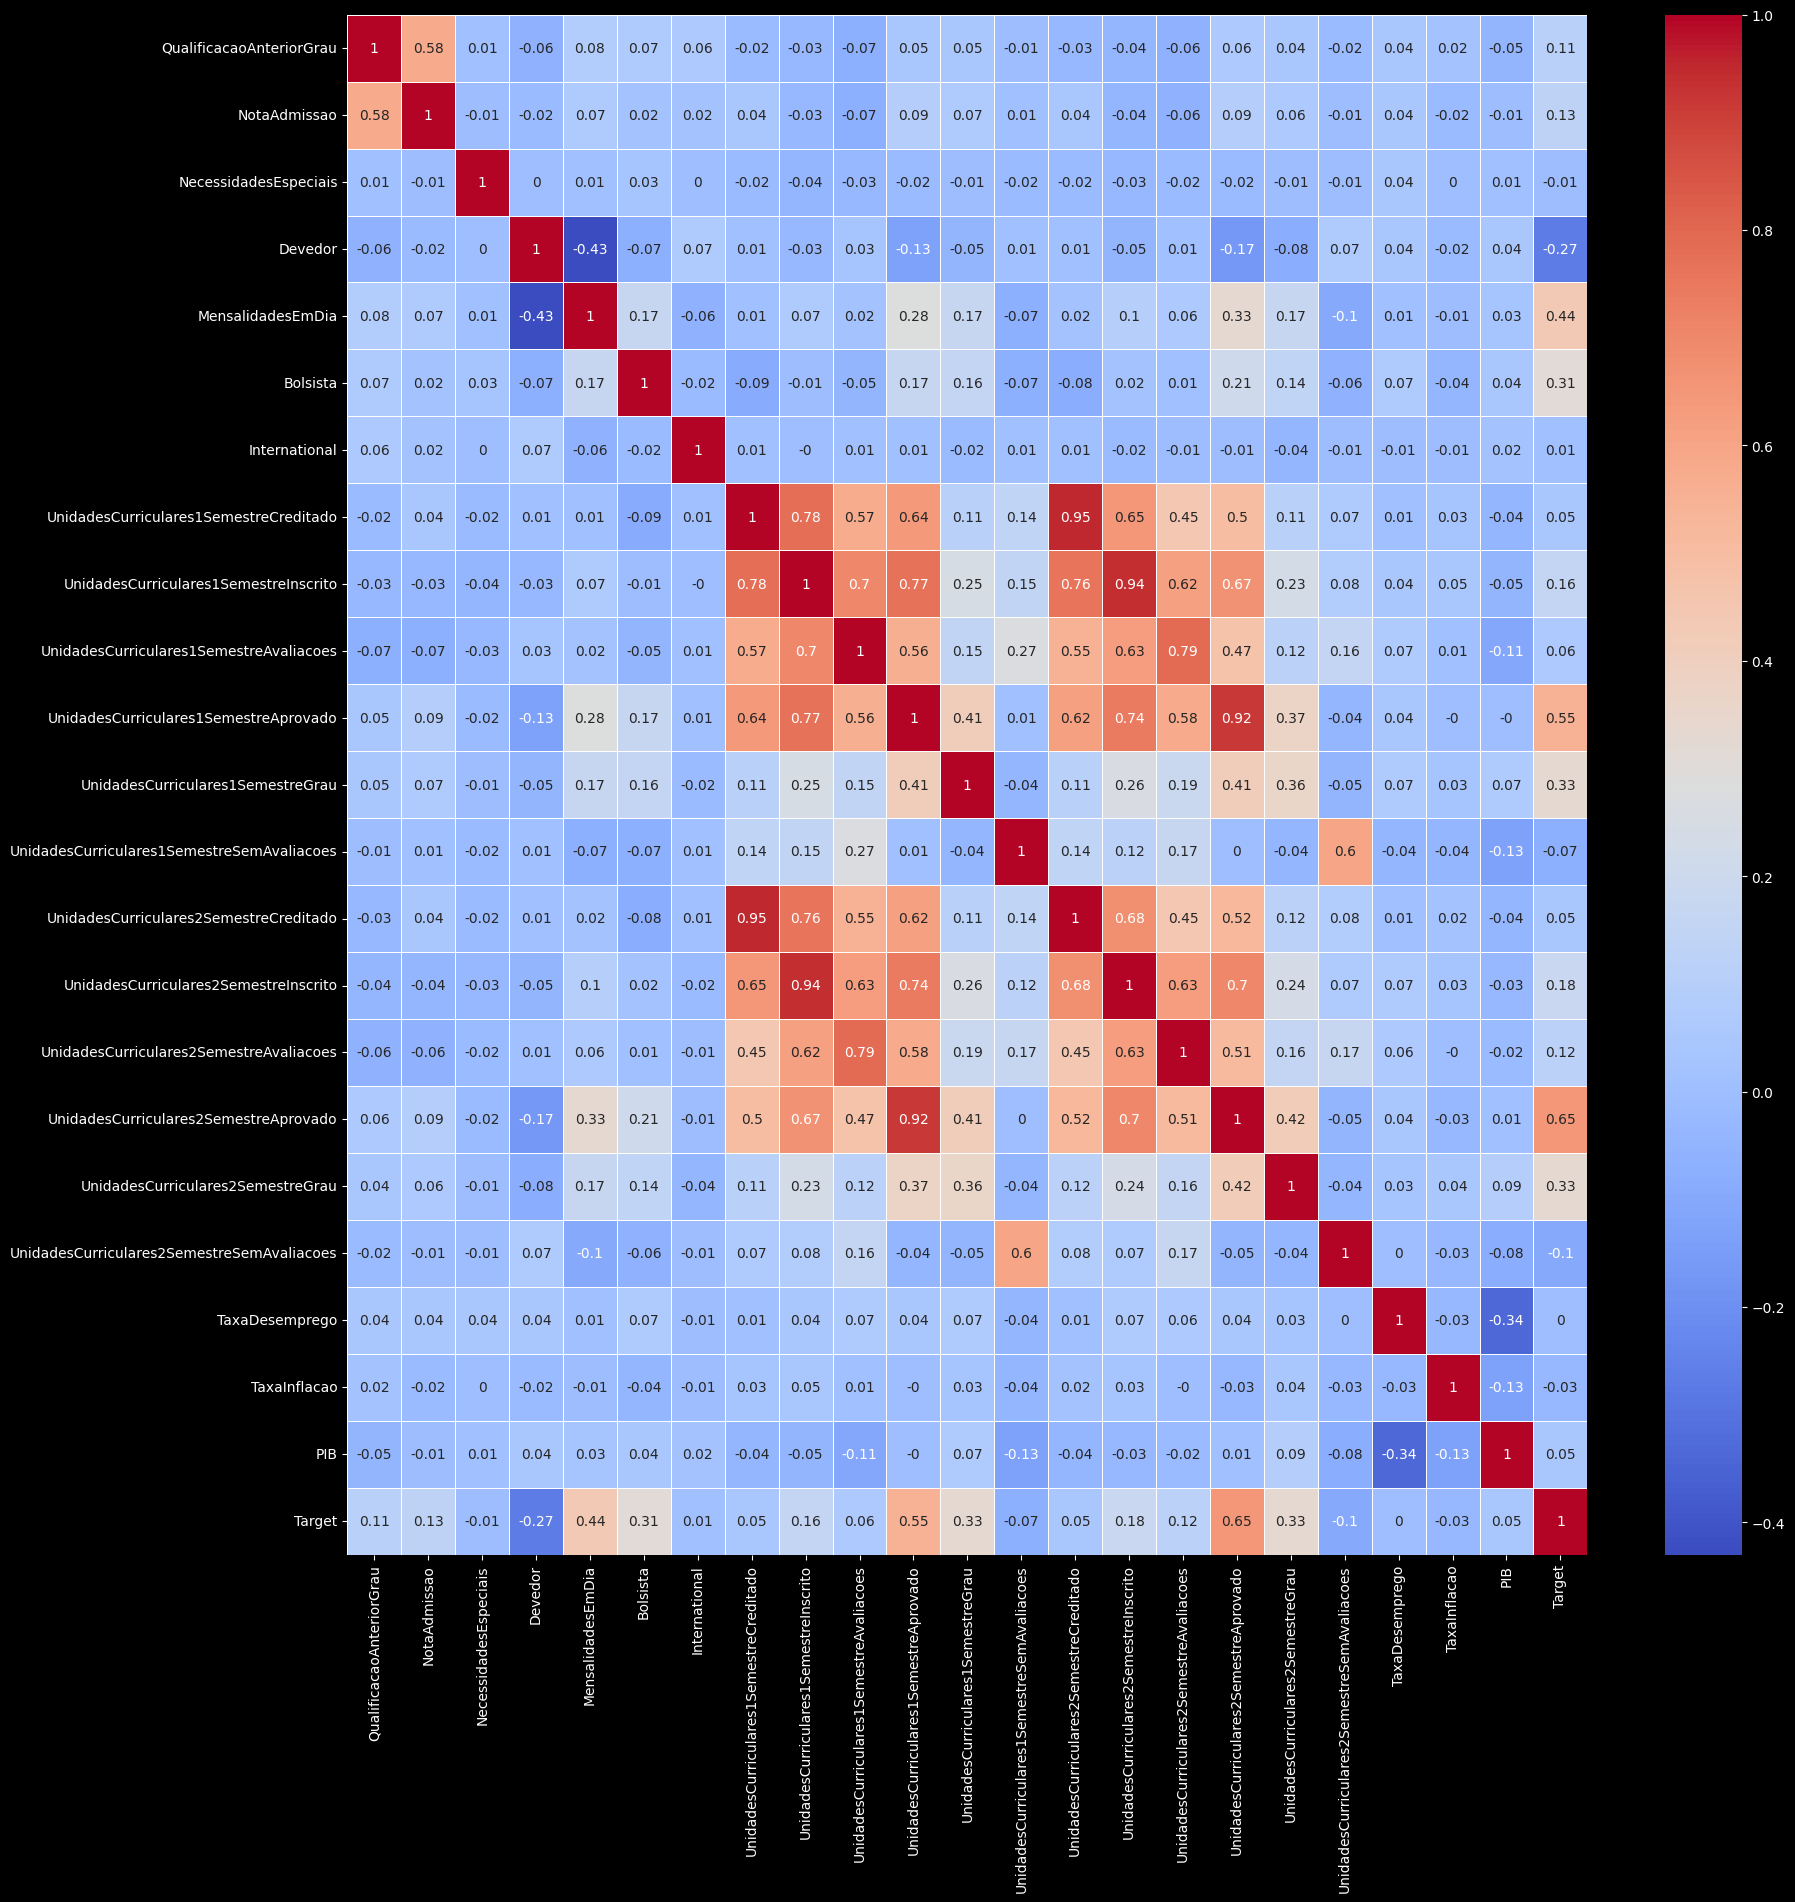

In [59]:
numeric_columns = df_concatenado.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

Atenção aqui para a Multicolinearidade!A multicolinearidade é um conceito estatístico que se refere à existência de relações lineares exatas ou altamente correlacionadas entre duas ou mais variáveis independentes.


## Separando as bases em treino e teste 🔄

Para treinar modelos de aprendizado de máquina, é importante seprar os dados em treino e teste. Sempre a maior porcentagem da base é alocada na base de treino (aproximadamente 80%) e os restante na base de teste (aproximadamente 20%).

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df_concatenado[['Devedor', 'TaxaDesemprego', 'MensalidadesEmDia', 'Bolsista', 'UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreAvaliacoes', 'UnidadesCurriculares1SemestreGrau']]
y = df_concatenado['Target']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [63]:
print(X_train.shape, X_test.shape)

(2904, 7) (726, 7)


### Criando a pipeline🛠️

Agora vamos colocar na pipeline todo os tratamentos dos dados necessários nas bases de treino e teste.

In [64]:
from sklearn.pipeline import Pipeline

# Crie uma única instância do scaler
scaler = CustomMinMaxScaler(columns=['Devedor', 'TaxaDesemprego', 'MensalidadesEmDia', 'Bolsista', 'UnidadesCurriculares1SemestreAprovado', 'UnidadesCurriculares1SemestreAvaliacoes', 'UnidadesCurriculares1SemestreGrau'])

def pipeline_treino(df):
  pipeline = Pipeline([('min_max', scaler)])
  df_pipeline = pipeline.fit_transform(df)

  # Converta o resultado para DataFrame
  df_pipeline_train = pd.DataFrame(df_pipeline, columns=df.columns)
  return df_pipeline_train


def pipeline_teste(df):
  pipeline = Pipeline([('min_max', scaler)])
  df_pipeline = pipeline.transform(df)

  # Converta o resultado para DataFrame
  df_pipeline_test = pd.DataFrame(df_pipeline, columns=df.columns)
  return df_pipeline_test


In [65]:
# Utilize as pipelines para normalizar os dados de treino e teste
train = pipeline_treino(X_train)
test =  pipeline_teste(X_test)

In [66]:
X_train

,Devedor,TaxaDesemprego,MensalidadesEmDia,Bolsista,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreGrau
3888,0,7.6,1,0,5,7,1.300000e+01
3796,0,8.9,1,0,6,8,1.357143e+16
1793,0,16.2,1,0,0,16,0.000000e+00
1109,0,7.6,1,0,4,7,1.240000e+01
3053,0,7.6,1,1,5,5,1.260000e+01
...,...,...,...,...,...,...,...
2351,0,16.2,1,0,12,32,1.285714e+16
4219,0,10.8,1,0,5,8,1.300000e+01
1566,0,13.9,1,1,7,8,1.485000e+01
592,0,11.1,1,1,6,9,1.212500e+04


In [67]:
train

,Devedor,TaxaDesemprego,MensalidadesEmDia,Bolsista,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreGrau
0,0.0,0.000000,1.0,0.0,0.192308,0.155556,7.500000e-16
1,0.0,0.151163,1.0,0.0,0.230769,0.177778,7.829670e-01
2,0.0,1.000000,1.0,0.0,0.000000,0.355556,0.000000e+00
3,0.0,0.000000,1.0,0.0,0.153846,0.155556,7.153846e-16
4,0.0,0.000000,1.0,1.0,0.192308,0.111111,7.269231e-16
...,...,...,...,...,...,...,...
2899,0.0,1.000000,1.0,0.0,0.461538,0.711111,7.417582e-01
2900,0.0,0.372093,1.0,0.0,0.192308,0.177778,7.500000e-16
2901,0.0,0.732558,1.0,1.0,0.269231,0.177778,8.567308e-16
2902,0.0,0.406977,1.0,1.0,0.230769,0.200000,6.995192e-13



### **Por que aplicamos as normalizações com as bases já separadas em treino e teste?** 🤔

Se aplicarmos normalizações ou qualquer tipo de tratamento nos dados antes de dividir em conjuntos de treino e teste, podemos acabar **introduzindo informações do conjunto de teste no conjunto de treino**. Isso pode levar a uma avaliação otimista do desempenho do modelo, uma vez que o modelo terá visto parte dos dados de teste durante o treinamento. Este tipo de problema também é chamado de *Data Leak* (vazamento de dados).

In [68]:
train.head(3)

,Devedor,TaxaDesemprego,MensalidadesEmDia,Bolsista,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreGrau
0,0.0,0.000000,1.0,0.0,0.192308,0.155556,7.500000e-16
1,0.0,0.151163,1.0,0.0,0.230769,0.177778,7.829670e-01
2,0.0,1.000000,1.0,0.0,0.000000,0.355556,0.000000e+00


In [69]:
test.head(3)

,Devedor,TaxaDesemprego,MensalidadesEmDia,Bolsista,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreGrau
0,1.0,0.372093,1.0,0.0,0.038462,0.222222,6.923077e-16
1,0.0,0.372093,1.0,0.0,0.230769,0.133333,8.557692e-01
2,0.0,0.372093,1.0,1.0,0.230769,0.133333,7.692308e-01


# **Ajustando o desequilíbrio da base**⚖️

A técnica **SMOTE (Synthetic Minority Over-sampling Technique)** é comumente usada para equilibrar conjuntos de dados desequilibrados, especialmente quando se lida com problemas de classificação em que as classes possuem tamanhos significativamente diferentes.

In [70]:
! pip install --upgrade imbalanced-learn

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [71]:
from imblearn.over_sampling import SMOTE

# Aplicando o SMOTE apenas nos dados de treino
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(train, y_train)

# Verificando a distribuição das classes após o SMOTE nos dados de treino
print("Distribuição das classes no conjunto de treino após SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)

# Os dados de teste permanecem inalterados
# Verificando a distribuição das classes nos dados de teste
print("\nDistribuição das classes no conjunto de teste original:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)


Distribuição das classes no conjunto de treino após SMOTE:
Target
1    50.0
0    50.0
Name: proportion, dtype: float64

Distribuição das classes no conjunto de teste original:
Target
1    60.847107
0    39.152893
Name: proportion, dtype: float64


# Criando uma função para executar e validar o modelo 🚀✅

In [72]:
def roda_modelo_com_validacao_cruzada(modelo, x_train_resampled, y_train_resampled, x_test_escalonado, y_test):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report
    from sklearn.model_selection import cross_val_score
    import matplotlib.pyplot as plt
    from sklearn.model_selection import StratifiedKFold

    # Treinando modelo com os dados de treino
    modelo.fit(x_train_resampled, y_train_resampled)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test_escalonado)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predição dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test_escalonado)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(x_test_escalonado)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Realizar validação cruzada de 5 folds e imprimir resultados
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(modelo, x_train_resampled, y_train_resampled, cv=skf, scoring='roc_auc')

    print("\nResultados da Validação Cruzada de 5 Folds:")
    print("AUC médio:", scores.mean())
    print("Desvio padrão AUC:", scores.std())

    # Um desvio padrão alto pode indicar que o desempenho do modelo é mais sensível à escolha específica dos conjuntos de treino
    # e teste em cada fold, enquanto um desvio padrão baixo sugere uma maior robustez.


## Regressão Logística

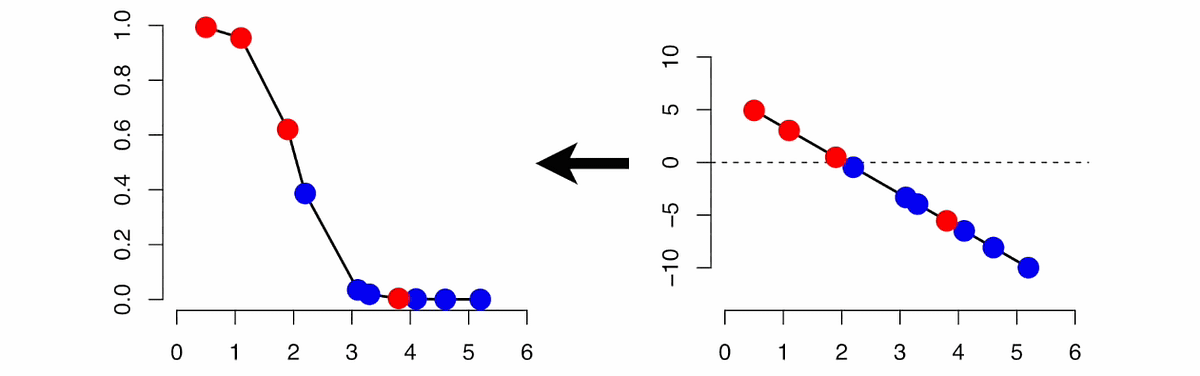

Utiliza a **função logística** para classificar os atributos (classificação binária) entre 0 e 1. A ideia do modelo é **encontrar os melhores coeficientes** que consigam gerar uma curva logística que mapeia corretamente os dados no treinamento. Na etapa de treinamento, com base na **função de custo (erro)**, é calculado a média do erro associado entre o valor real e o valor predito. A idéia é utilizar metodos de **minimização do erro (otimização)** para encontrar os melhores coeficientes.

**Vantagens**
- Consegue abranger de forma maior a classificação de valores binários entre 0 e 1 do que uma regressão linear convencional devido a sua função de cutso, isto porque a ideia da regressão logística é criar uma fronteiras de descião linear.
- A regressão logística é computacionalmente eficiente e não requer muitos recursos computacionais, o que a torna adequada para conjuntos de dados de tamanho moderado.
- A regressão logística modela diretamente as probabilidades das classes, proporcionando uma interpretação natural para as previsões.

**Desvantagens**
- Não pode ser usada para resolver problemas não lineares.
- Pode ser sensível a outliers, especialmente quando a decisão é baseada em probabilidades extremas.
- A presença de multicolinearidade (alta correlação entre features) pode afetar a estabilidade dos coeficientes estimados.
- A regressão logística é diretamente aplicável apenas a problemas de classificação binária.

**Link da biblioteca:**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



------------------------------Resultados LogisticRegression()------------------------------

AUC 0.896568892995985

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       284
           1       0.88      0.87      0.88       442

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726


Roc Curve



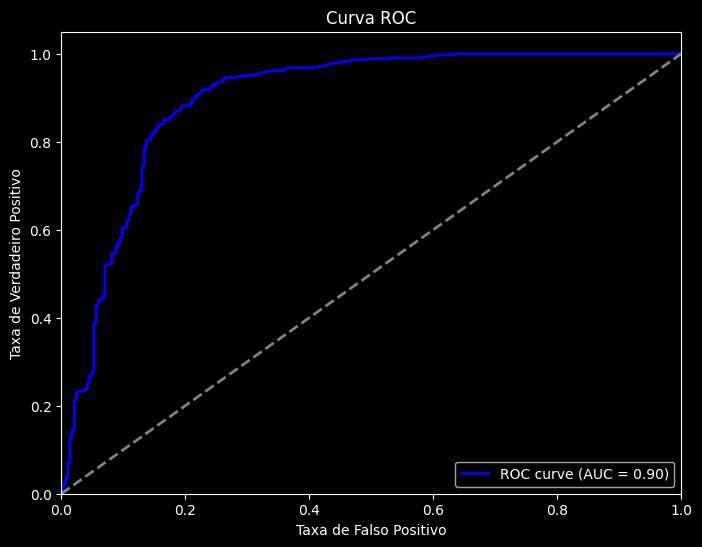


Resultados da Validação Cruzada de 5 Folds:
AUC médio: 0.9145344808051108
Desvio padrão AUC: 0.010774210253832545


In [73]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo_com_validacao_cruzada(modelo_logistico, x_train_resampled, y_train_resampled, test, y_test)

## KNN

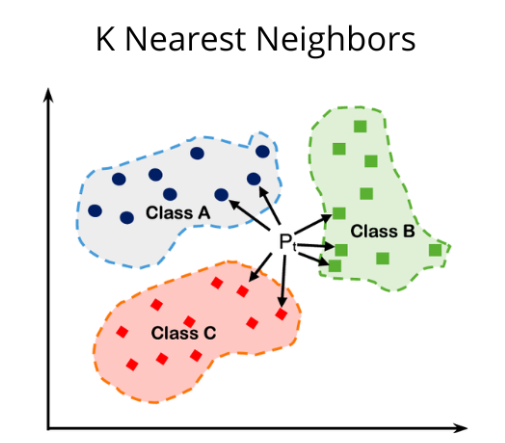

Não paramétrico (não tem uma função matemática definida). O algoritmo utiliza a **distância Euclidiana** (Teorema de Pitágoras) para realizar a **distância entre os pontos mais próximos** (vizinhos mais próximos).

**Vantagens**
- Rápido em datasets pequenos.
- Como as predições são baseadas em votos de vizinhos, o KNN é relativamente robusto a outliers e ruído nos dados.

**Desvantagens**
 - Se K for muito pequeno, a classificação fica sensível ter ruídos. Se k é muito grande, a vizinhança pode incluir elementos de outras classes.
 - O desempenho do KNN pode diminuir em conjuntos de dados de alta dimensionalidade, devido à chamada "maldição da dimensionalidade".
 - A medida de distância torna-se menos significativa em espaços de alta dimensão.A presença de atributos irrelevantes ou não informativos pode afetar negativamente o desempenho do KNN, pois a medida de distância pode ser afetada.
 - Se uma classe for significativamente mais prevalente do que outras, o KNN pode favorecer a classe majoritária, resultando em previsões enviesadas.

**Link da biblioteca:**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


------------------------------Resultados KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')------------------------------

AUC 0.8613456758651455

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       284
           1       0.85      0.84      0.85       442

    accuracy                           0.82       726
   macro avg       0.81      0.81      0.81       726
weighted avg       0.82      0.82      0.82       726


Roc Curve



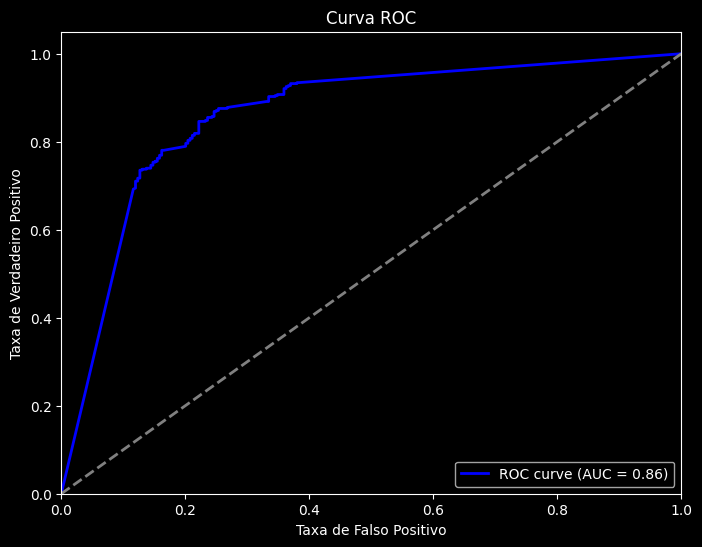


Resultados da Validação Cruzada de 5 Folds:
AUC médio: 0.9009107289862577
Desvio padrão AUC: 0.00861350091204729


In [74]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3, metric= 'euclidean', weights='distance')
roda_modelo_com_validacao_cruzada(modelo_knn, x_train_resampled, y_train_resampled, test, y_test)

## SVM (Máquina de Vetor Suporte)

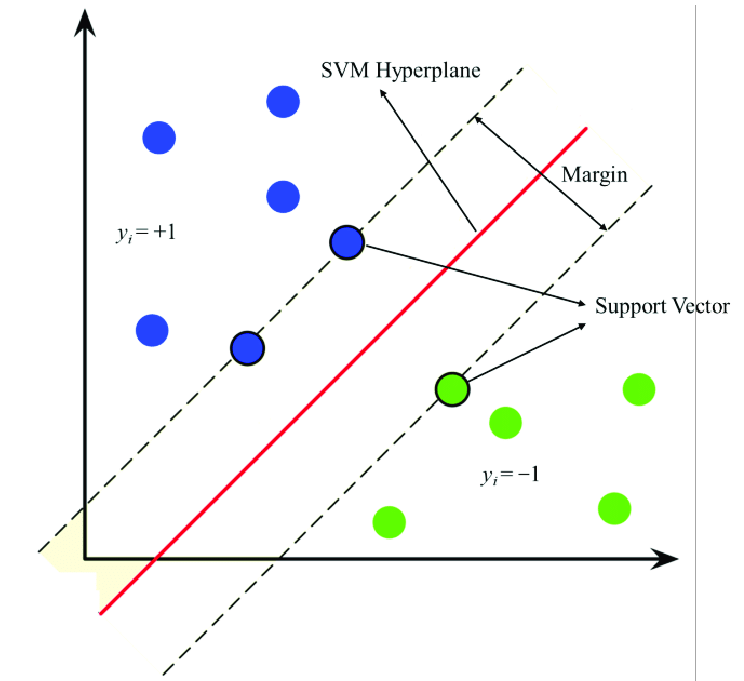

O SVM tenta encontrar a **melhor reta que maximiza a margem de separação (distância) aos dados**. Equação da reta C: São criadas duas retas de suporte (auxílio para seprarar as margens de dados) e posteriormente é traçado uma reta ao meio (margem C). A reta C cria um hiperplano aos dados. É utilizada uma **função custo (função erro)** na etapa de treinamento. Para dados circulares (não lineares) é utilizado o **truque de kernel**: projetar os dados para uma dimensão maior.

**Vantagens**

- Trabalha com problemas linearmente e não-linearmente separáveis.
- O SVM funciona bem em espaços de alta dimensão, incluindo problemas nos quais o número de features é maior que o número de amostras. Isso o torna eficaz em tarefas de classificação com muitas features. Também é eficaz em espaços de baixa dimensão, tornando-o versátil para diferentes tipos de conjuntos de dados.
- A otimização do SVM busca encontrar o hiperplano que maximiza a margem entre as classes, o que ajuda a reduzir o risco de overfitting.
- Os SVMs podem ser ajustados para lidar com conjuntos de dados desbalanceados, atribuindo diferentes pesos às classes.

**Desvantagens**

- Sensível a outliers.
- O tempo de treinamento pode ser extremamente lento e computacionalmente  complexo dependendo da quantidade de características.
- A interpretação do modelo SVM pode ser desafiadora, especialmente em espaços de alta dimensão ou quando são utilizados kernels complexos.
- Embora os SVMs possam ser utilizados para regressão, não são naturalmente adaptados para esse propósito e podem não funcionar tão bem quanto outros métodos em alguns cenários de regressão.

**Link da biblioteca:**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html



------------------------------Resultados SVC(probability=True)------------------------------

AUC 0.8849738703715506

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       284
           1       0.86      0.90      0.88       442

    accuracy                           0.85       726
   macro avg       0.84      0.83      0.84       726
weighted avg       0.84      0.85      0.84       726


Roc Curve



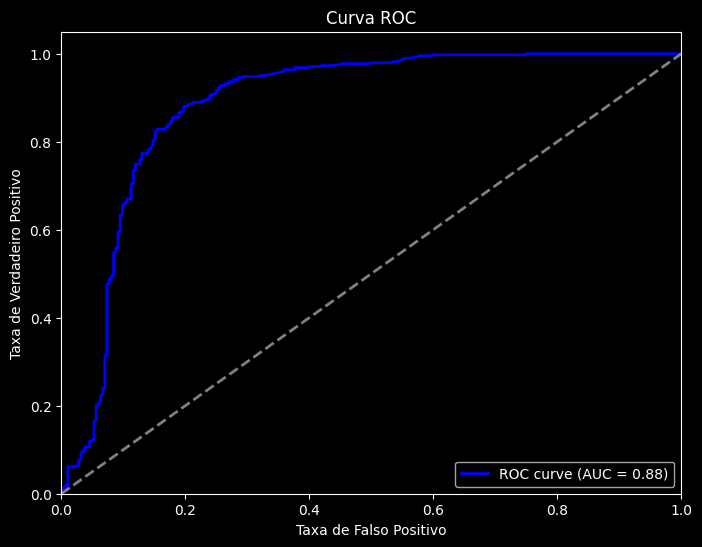


Resultados da Validação Cruzada de 5 Folds:
AUC médio: 0.9157412862008634
Desvio padrão AUC: 0.011257749325688512


In [75]:
from sklearn.svm import SVC
modelo_SVM = SVC(probability=True)
roda_modelo_com_validacao_cruzada(modelo_SVM, x_train_resampled, y_train_resampled, test, y_test)

## Decision Tree

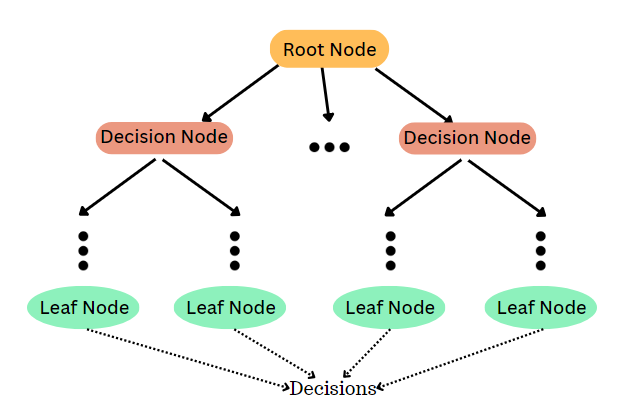

Não paramétrico (não tem uma função matemática definida). Utiliza de condições **IF e ELSE** para definir os caminhos tomados pelo algoritmo. Composto por nós (perguntas), ramos (decisões) e folhas (classe). A ideia é encontrar quais são as **melhores perguntas** para se passar no modelo com base na **entropia** dos dados (medida de impureza dos dados). Basicamente calcula quantos exemplos caem em um nó: Calcula a probabilidade com base nos dados.

**Vantagens**
- Fácil de entender a regras (caminhos) tomadas pelo algoritmo.
- Árvores de decisão podem lidar tanto com variáveis numéricas quanto categóricas sem a necessidade de pré-processamento adicional.
- Em conjuntos de dados pequenos ou médios, as árvores de decisão podem ser mais eficientes do que algoritmos mais complexos.
- Diferentemente de alguns algoritmos, como SVMs, as árvores de decisão não exigem que os dados sejam normalizados ou padronizados.

**Desvantagens**
- Com muitos atributos podem gerar overfiting.
- Podem comsumir muita memória de processamento.
- As árvores de decisão podem ser propensas ao overfitting, especialmente quando não são limitadas em profundidade. Estratégias como a poda (pruning) podem ser aplicadas para mitigar esse problema.
- Muitas vezes necessita de técnicas de poda (eliminar algumas possibilidades).
- Pequenas variações nos dados de treinamento podem resultar em árvores de decisão completamente diferentes, o que pode torná-las instáveis.
- Se uma classe for significativamente mais prevalente do que outras, as árvores de decisão podem ficar enviesadas em direção à classe majoritária.

**Link da biblioteca:**
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC 0.8388168376776497

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       284
           1       0.86      0.83      0.84       442

    accuracy                           0.81       726
   macro avg       0.80      0.81      0.81       726
weighted avg       0.82      0.81      0.81       726


Roc Curve



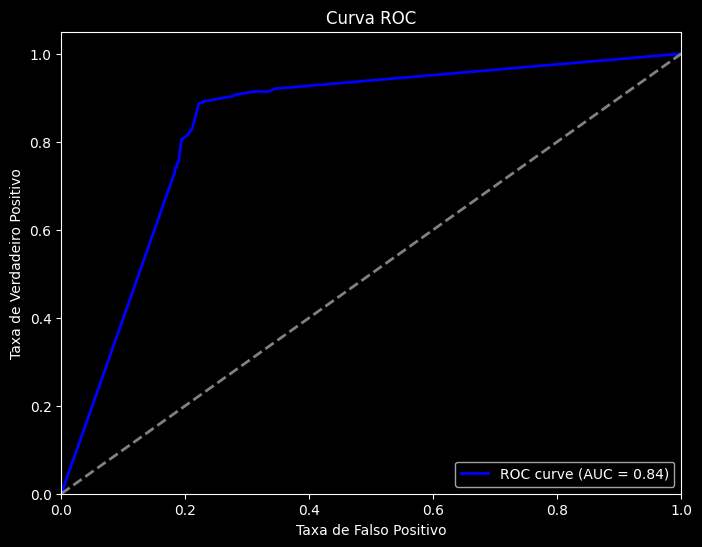


Resultados da Validação Cruzada de 5 Folds:
AUC médio: 0.8725413772245686
Desvio padrão AUC: 0.012798409181076062


In [76]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()
roda_modelo_com_validacao_cruzada(modelo_tree, x_train_resampled, y_train_resampled, test, y_test)


 ## Random Forest

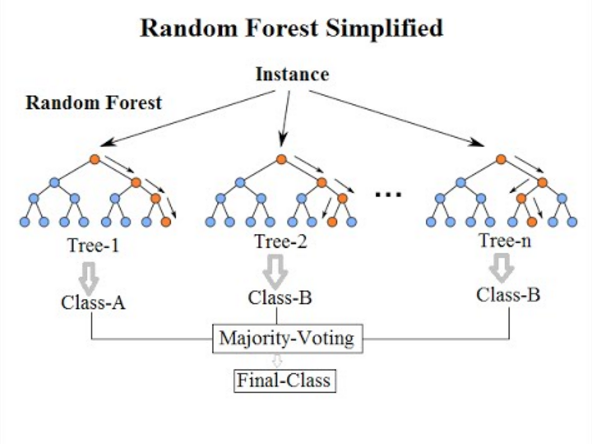

Várias árvores de decisões (o algoritmo de forma inteliente, **inicializa várias árvores de decisões, calcula o ganho de informação (entropia) e posteriormente é calculado uma moda com base na árvore que possui a maior frequência de baloes (nós)** dado a análise de todas as possibilidades possíveis).

**Vantagens**
- Gera de forma mais precisa qual é a melhor árvore de decisão possível.
- A Random Forest constrói várias árvores de decisão independentes, e as combina para reduzir o overfitting. A média ou a votação entre várias árvores ajuda a generalizar melhor para dados não vistos.
- Como as Random Forests combinam várias árvores, são mais estáveis e robustas em comparação com árvores de decisão individuais.
- Pode lidar melhor com conjuntos de dados desbalanceados, pois a média ou votação entre várias árvores ajuda a mitigar o viés em direção à classe majoritária.
- A Random Forest é capaz de capturar relações não lineares nos dados, especialmente quando se utiliza o "bootstrap" e subamostragem aleatória de features.

**Desvantagens**
- Deve-se utilizar técnicas de poda para evitar overfiting.
- Apesar de ser mais robusta, a Random Forest é menos interpretável do que uma única árvore de decisão, especialmente à medida que o número de árvores na floresta aumenta.
- Em comparação com árvores de decisão individuais, a Random Forest pode ser mais computacionalmente intensiva e levar mais tempo para treinar, principalmente em grandes conjuntos de dados.

**Link da biblioteca:**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


------------------------------Resultados RandomForestClassifier()------------------------------

AUC 0.9025157733732713

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       284
           1       0.87      0.88      0.88       442

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726


Roc Curve



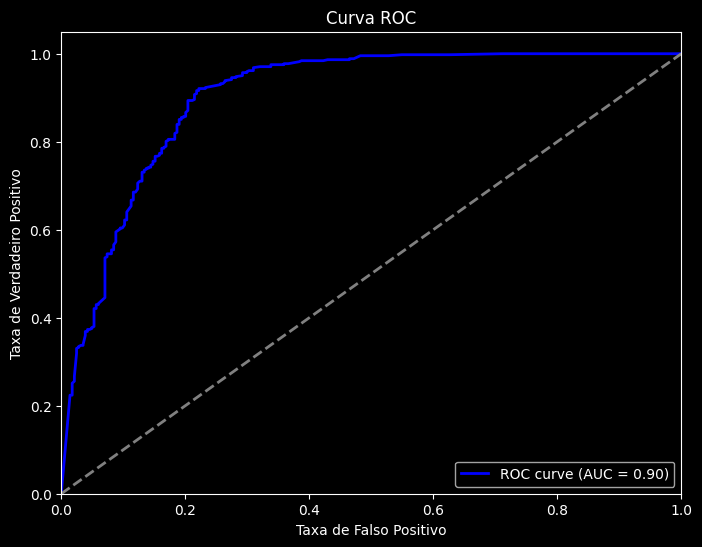


Resultados da Validação Cruzada de 5 Folds:
AUC médio: 0.9353954242316291
Desvio padrão AUC: 0.010241056628398311


In [77]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier()
roda_modelo_com_validacao_cruzada(modelo_random_forest, x_train_resampled, y_train_resampled, test, y_test)

In [78]:
! pip install xgboost

## GradientBoostingClassifier

Modelo de emsemble com uma implementação eficiente do algoritmo de **boosting**, que **combina várias árvores de decisão mais fracas para formar um modelo mais robusto e preciso**. Este modelo utiliza técnicas avançadas para otimização e controle de overfitting.

O boosting é uma técnica de ensemble onde vários modelos fracos (geralmente árvores de decisão rasas) são combinados para formar um modelo forte.

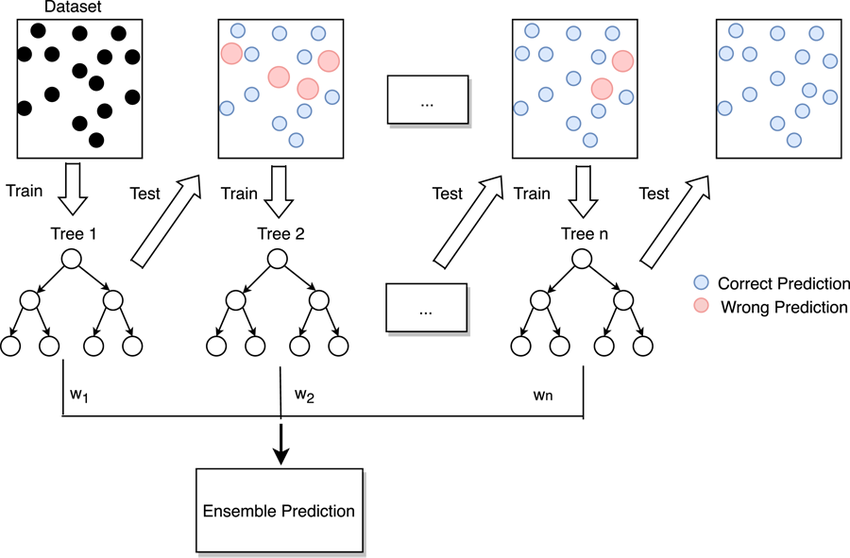

**Vantagens**

- O XGBoost é conhecido por ter um desempenho superior em muitos conjuntos de dados em comparação com outros algoritmos de machine learning.
- Inclui técnicas de regularização incorporadas para lidar com overfitting, como a penalização L1 (lasso) e L2 (ridge) nos pesos das features.
- Pode lidar eficientemente com dados ausentes sem a necessidade de pré-processamento adicional.
- Pode lidar com dados numéricos e categóricos diretamente, sem a necessidade de codificação prévia.
- Fornece uma estimativa da importância das features, facilitando a seleção de features relevantes.

**Desvantagens**

- Pode ser sensível à escolha de hiperparâmetros, e um ajuste cuidadoso pode ser necessário para obter o desempenho ideal.
- Interpretação Menos Direta.
- Embora o XGBoost tenha muitos parâmetros que podem ser ajustados, isso pode ser uma vantagem, mas também significa que é necessário um ajuste adequado para obter o desempenho desejado.
- Em conjuntos de dados muito pequenos, o XGBoost pode ser mais propenso ao overfitting. A regularização adequada é importante.



------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC 0.9184365241221082

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       284
           1       0.88      0.90      0.89       442

    accuracy                           0.86       726
   macro avg       0.86      0.85      0.86       726
weighted avg       0.86      0.86      0.86       726


Roc Curve



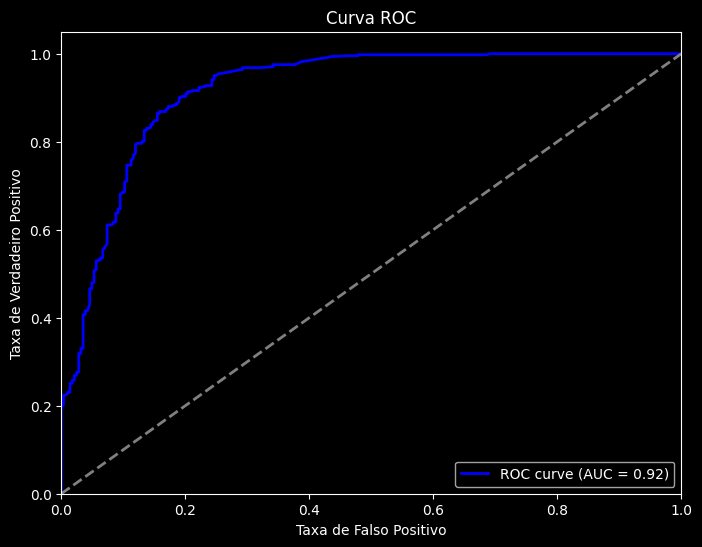


Resultados da Validação Cruzada de 5 Folds:
AUC médio: 0.93983771293102
Desvio padrão AUC: 0.010599663809854679


In [79]:
# Validando sem configurações de hiperparametros:
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier()
roda_modelo_com_validacao_cruzada(xgb, x_train_resampled, y_train_resampled, test, y_test)

In [80]:
def melhores_hiperparamentros_xgb(x_train, y_train):
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    from sklearn.metrics import accuracy_score, make_scorer
    import numpy as np

    # Parâmetros testados
    param_grid = {
            # Um valor mais baixo geralmente requer um número maior de árvores para manter o desempenho,
            # mas pode melhorar a generalização.
            'learning_rate':[0.01, 0.3],
            # Define o número de árvores a serem criadas no processo de boosting.
            # Quanto maior o número de árvores, mais complexo será o modelo, mas também pode aumentar o risco de overfitting.
            'n_estimators':[50, 100, 200, 400, 500],
            # A profundidade máxima de cada árvore. Árvores mais profundas podem modelar relações mais complexas nos dados,
            # mas também podem levar a overfitting.
            'max_depth': [1, 2, 5, 8, 10]
              }
    # Configurar validação cruzada estratificada (StratifiedKFold)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid = GridSearchCV(GradientBoostingClassifier(),
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=cv,
                      n_jobs=1)  # cv = gerador de validação cruzada / n_jobs = determina a quantidade de jobs processados

    grid.fit(x_train, y_train)  # Selecionando os melhores hiperparâmetros com base nos dados de treino
    xgb_params = grid.best_params_
    return print("Melhores hiperparâmetros:", xgb_params)


In [81]:
#melhores_hiperparamentros_xgb(x_train_resampled, y_train_resampled) #pode levar um tempinho


------------------------------Resultados GradientBoostingClassifier(learning_rate=0.01, max_depth=5)------------------------------

AUC 0.9185560193741635

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       284
           1       0.88      0.90      0.89       442

    accuracy                           0.87       726
   macro avg       0.86      0.85      0.86       726
weighted avg       0.86      0.87      0.86       726


Roc Curve



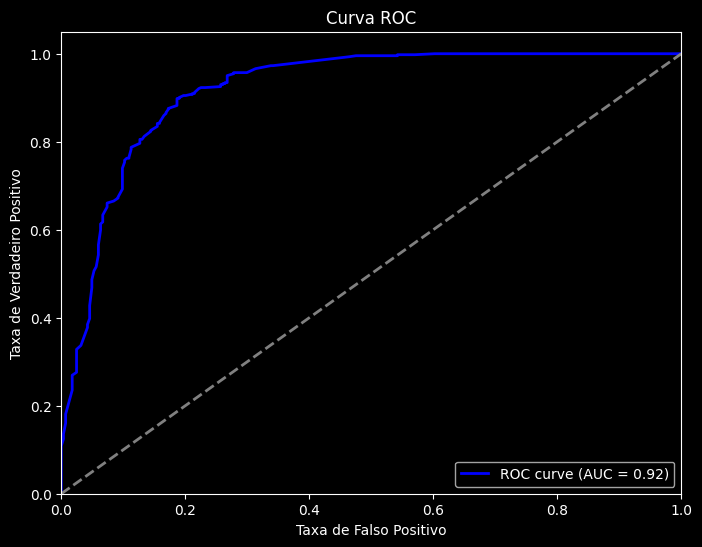


Resultados da Validação Cruzada de 5 Folds:
AUC médio: 0.9322170189029249
Desvio padrão AUC: 0.00722713229935511


In [82]:
# Executando o xgboosting com novos hiperparametros
xgb = GradientBoostingClassifier(learning_rate= 0.01, max_depth=5, n_estimators=100)
roda_modelo_com_validacao_cruzada(xgb, x_train_resampled, y_train_resampled, test, y_test)

In [83]:
import joblib
modelo_xg = joblib.dump(xgb, 'modelo_xgb.joblib')

# Testando o modelo

In [84]:
df_teste = pd.read_excel('df_dados_teste.xlsx')

In [85]:
df_teste.head()

,Devedor,TaxaDesemprego,MensalidadesEmDia,Bolsista,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreGrau
0,1,10.8,0,0,1,1,3
1,0,1.8,1,1,7,8,18
2,1,12.5,0,0,2,4,1


In [88]:
# Predições
#base de dados a ser processada pela pipeline
data = pd.read_excel('df_dados_teste.xlsx')

#base de dados original
data_original = pd.read_excel('df_dados_teste.xlsx')

# pipeline
data_normalized = pipeline_teste(data)

# aplicando o modelo
model = joblib.load('modelo_xgb.joblib')

# predições
final_pred = model.predict(data_normalized)

# Obtendo o predict
def mapear_valor(valor):
    if valor == 0:
        return 'Possível desistente'
    elif valor == 1:
        return 'Possível formando'
    else:
        return 'Desconhecido'

# Aplicar a função mapear_valor aos resultados
data_original['resultado'] = [mapear_valor(pred) for pred in final_pred]

# Imprimir as previsões
print("Previsões para os novos dados:")
data_original.head()

Previsões para os novos dados:


,Devedor,TaxaDesemprego,MensalidadesEmDia,Bolsista,UnidadesCurriculares1SemestreAprovado,UnidadesCurriculares1SemestreAvaliacoes,UnidadesCurriculares1SemestreGrau,resultado
0,1,10.8,0,0,1,1,3,Possível desistente
1,0,1.8,1,1,7,8,18,Possível formando
2,1,12.5,0,0,2,4,1,Possível desistente


## **Modelos não-supervisionados**🧩


### Criando um modelo de clusterização
O Agrupamento ou Clustering faz parte das técnicas de Aprendizado de Máquina não Supervisionado.
Ele pode ser aplicado para diferentes problemas que envolvam segmentação/agrupamento de dados.
As técnicas de agrupamento apresentam a vantagem de não precisarem de dados rotulados (label). Nesse caso, queremos encontrar a label que não existe previamente sobre um conjunto de dados.


### K-Means

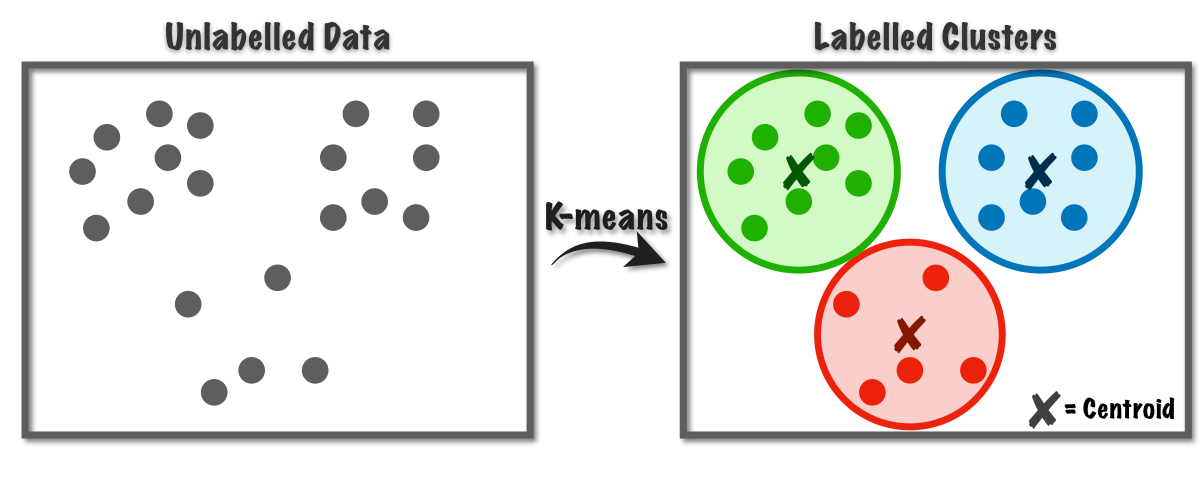

Sobre o modelo: O K-Means parte da ideia de quebrar o espaço multidimensional de dados em partições a partir do centróide dos dados. Após inicializar os centróides de forma aleatória sobre os dados, o K-Means calcula a distância dos dados para os centros mais próximos. Esse cálculo da distância é realizado várias vezes até que os dados sejam agrupados da melhor forma possível de acordo com a distância mais próxima de um centróide (ponto centro de dado na qual será formado o grupo).

Hiperparametros: Definição do K. Para definir esse valor de K, é necessário utilizar o método Elbow para encontrar o melhor hiperparâmetros de K. O método Elbow consiste no cálculo da soma dos erros quadráticos.

Vantagens: Implementação simplificado e possui uma certa facilidade em lidar com qualquer medida de similaridade entre os dados.

Desvantagem: Difícil definir o melhor K. Sensível a outliers. Não consegue distinguir grupos em dados não-globulares.

Para mais informação: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [89]:
def pipeline_cluster(df):

    pipeline = Pipeline([
        ('label_encoder', CustomLabelEncoder(columns=['EstadoCivil', 'Curso', 'QualificacaoAnterior', 'Nacionalidade', 'Genero']))
    ])
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

scaler = MinMaxScaler()

# Especifique as colunas para aplicar o scaler
columns_to_scale = ['QualificacaoAnteriorGrau', 'NotaAdmissao', 'NecessidadesEspeciais', 'Devedor', 'MensalidadesEmDia',
                    'Bolsista', 'International', 'UnidadesCurriculares1SemestreCreditado', 'UnidadesCurriculares1SemestreInscrito',
                    'UnidadesCurriculares1SemestreAvaliacoes', 'UnidadesCurriculares1SemestreAprovado',
                    'UnidadesCurriculares1SemestreGrau', 'UnidadesCurriculares1SemestreSemAvaliacoes',
                    'UnidadesCurriculares2SemestreCreditado', 'UnidadesCurriculares2SemestreInscrito',
                    'UnidadesCurriculares2SemestreAvaliacoes', 'UnidadesCurriculares2SemestreAprovado',
                    'UnidadesCurriculares2SemestreGrau', 'UnidadesCurriculares2SemestreSemAvaliacoes',
                    'TaxaDesemprego','TaxaInflacao', 'PIB']

# Selecione as colunas que serão normalizadas
df_to_scale = df_concatenado[columns_to_scale]
scaler.fit(df_to_scale)
df_scaled = scaler.transform(df_to_scale)
df_concatenado[columns_to_scale] = df_scaled

In [90]:
# Executando a pipeline nos dados para executar os modelos de cluster

df_concatenado_tratado = pipeline_cluster(df_concatenado)
df_concatenado_cluster = df_concatenado_tratado.copy()
df_concatenado_dbscan = df_concatenado_tratado.copy()

### Calculando a inércia para definir o número de clusters:

A inércia de cluster é frequentemente usada como **critério para avaliar a qualidade dos agrupamentos em algoritmos como k-means**. Em geral, algoritmos de clustering tentam encontrar os **agrupamentos que minimizam essa inércia**, resultando em clusters bem definidos e compactos.

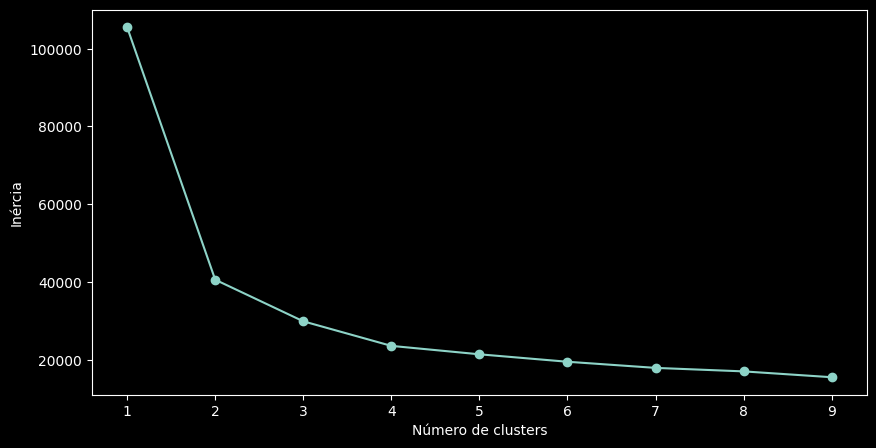

In [91]:
from sklearn.cluster import KMeans

# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))

# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_concatenado_tratado)
    sse.append(kmeans.inertia_) #calculo do erro do k-mens (mudar o centroide dos dados)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

In [92]:
# Definir o número de clusters (K)
k = 2  # Número de clusters desejado

# Criar e ajustar o modelo K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_concatenado_tratado)

kmeans_labels = kmeans.fit_predict(df_concatenado_tratado) # Armazenando as labels

# Adicionar os rótulos dos clusters ao DataFrame original
df_concatenado_cluster['cluster'] = kmeans.labels_

In [93]:
df_concatenado_cluster.groupby(['cluster']).describe()

EstadoCivil                                                Curso  \
              count      mean       std  min  25%  50%  75%  max   count   
cluster                                                                    
0            1831.0  2.809940  0.734720  0.0  3.0  3.0  3.0  5.0  1831.0   
1            1799.0  2.576431  1.028309  0.0  3.0  3.0  3.0  5.0  1799.0   

                                                         QualificacaoAnterior  \
              mean       std  min  25%   50%   75%   max                count   
cluster                                                                         
0         3.175314  1.852590  0.0  2.0   3.0   4.0   7.0               1831.0   
1        11.629238  2.531855  8.0  9.0  12.0  13.0  16.0               1799.0   

                                                       \
             mean       std  min  25%  50%  75%   max   
cluster                                                 
0        7.898962  1.309133  2.0  8.0  8.0  8.0  15.0   
1        8.072818  1.315066  0.0  8.0  8.0  8.0  15.0   

        QualificacaoAnteriorGrau                                          \
                           count      mean       std       min       25%   
cluster                                                                    
0                         1831.0  0.422068  0.134945  0.021053  0.347368   
1                         1799.0  0.375853  0.139934  0.000000  0.284211   

                                      Nacionalidade                            \
              50%       75%       max         count       mean       std  min   
cluster                                                                         
0        0.401053  0.494737  0.978947        1831.0  13.842709  1.289449  2.0   
1        0.378947  0.442105  1.000000        1799.0  13.782101  1.642826  0.0   

                                NotaAdmissao                           \
          25%   50%   75%   max        count      mean       std  min   
cluster                                                                 
0        14.0  14.0  14.0  18.0       1831.0  0.365566  0.154509  0.0   
1        14.0  14.0  14.0  18.0       1799.0  0.313851  0.148651  0.0   

                                           NecessidadesEspeciais            \
              25%       50%       75%  max                 count      mean   
cluster                                                                      
0        0.263158  0.353684  0.453158  1.0                1831.0  0.012015   
1        0.219474  0.295789  0.394211  1.0                1799.0  0.010006   

                                           Devedor                           \
              std  min  25%  50%  75%  max   count      mean       std  min   
cluster                                                                       
0        0.108984  0.0  0.0  0.0  0.0  1.0  1831.0  0.103768  0.305043  0.0   
1        0.099554  0.0  0.0  0.0  0.0  1.0  1799.0  0.123958  0.329625  0.0   

                            MensalidadesEmDia                                \
         25%  50%  75%  max             count      mean       std  min  25%   
cluster                                                                       
0        0.0  0.0  0.0  1.0            1831.0  0.881486  0.323305  0.0  1.0   
1        0.0  0.0  0.0  1.0            1799.0  0.850472  0.356707  0.0  1.0   

                        Genero                                               \
         50%  75%  max   count      mean       std  min  25%  50%  75%  max   
cluster                                                                       
0        1.0  1.0  1.0  1831.0  0.344620  0.475374  0.0  0.0  0.0  1.0  1.0   
1        1.0  1.0  1.0  1799.0  0.343524  0.475017  0.0  0.0  0.0  1.0  1.0   

        Bolsista                                              International  \
           count      mean       std  min  25%  50%  75%  max         count   
cluster                                      

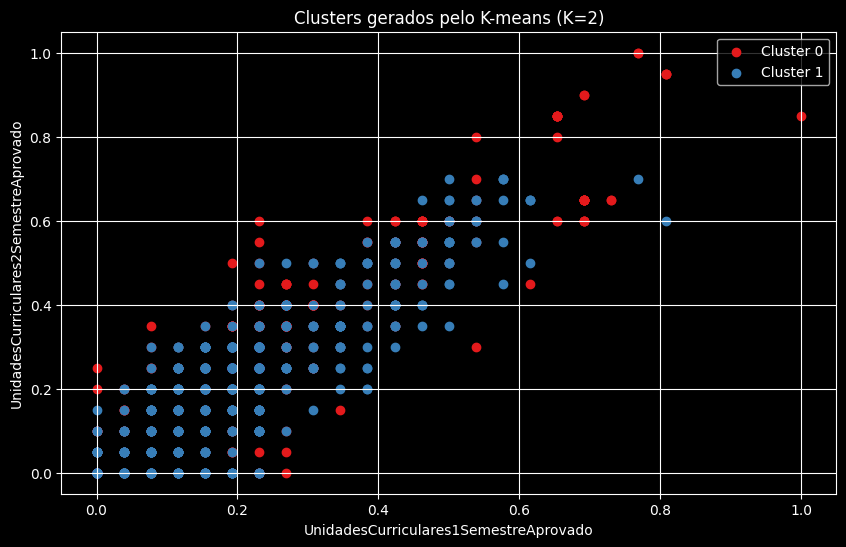

In [104]:
# Plotar os clusters em um gráfico de dispersão (scatter plot)
plt.figure(figsize=(10, 6))

# Escolha duas features para visualizar (exemplo: feature_1 e feature_2)
feature_1 = 'UnidadesCurriculares1SemestreAprovado'
feature_2 = 'UnidadesCurriculares2SemestreAprovado'

# Cores para os diferentes clusters
cluster_colors = sns.color_palette('Set1', n_colors=k)

for cluster_id, color in zip(range(k), cluster_colors):
    cluster_data = df_concatenado[df_concatenado_cluster['cluster'] == cluster_id]
    plt.scatter(cluster_data[feature_1], cluster_data[feature_2], color=color, label=f'Cluster {cluster_id}')

# Adicionar legendas e título ao gráfico
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title(f'Clusters gerados pelo K-means (K={k})')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
from sklearn.metrics import silhouette_score

# Silhouette score
# Avaliação tipo interna
# Mede o formato do cluster obtido: avalia a distância entre os centros dos clusters, nesse caso, queremos maximizar as distâncias)
#Valores próximos a -1, significa clusters ruins, próximo a 1, clusters bem separados.

silhouette_score = silhouette_score(df_concatenado_tratado, kmeans_labels)
print('Silhouette score:', silhouette_score)

# Analisando o resultado do score de silhouette
if silhouette_score < 0:
    print('A pontuação da silhueta é negativa, o que indica que os clusters não estão bem separados.')
elif silhouette_score == 0:
    print('A pontuação da silhueta é zero, o que indica que os clusters estão sobrepostos.')
else:
    print('A pontuação da silhueta é positiva, o que indica que os clusters estão bem separados.')

Silhouette score: 0.5294350554156463
A pontuação da silhueta é positiva, o que indica que os clusters estão bem separados.


### DBSCAN

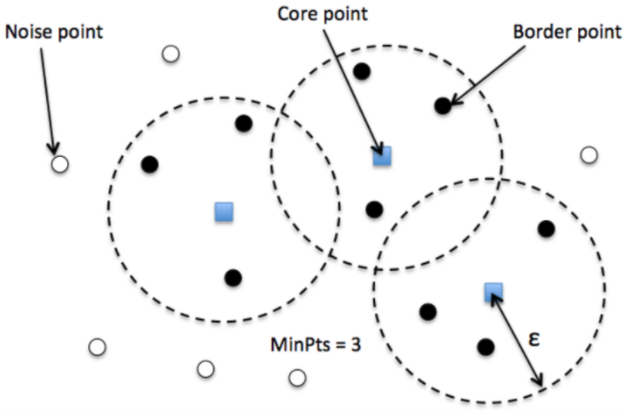

Sobre o modelo: O DBSCAN é um algoritmo que agrupa os dados com base em densidade (alta concentração de dados). Muito bom para tirar ruídos. O agrupamentos dos dados é calculado com base nos core (quantidade de pontos mínmos que seja igual ou maior a definição do MinPts), border (ponto de fronteira dos dados) e noise (ruído).

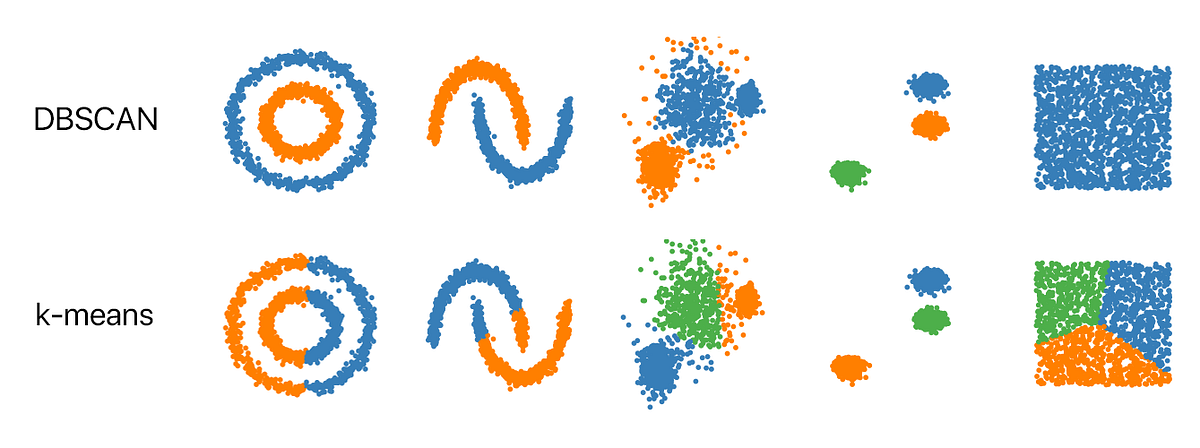

Hiperparametro: Eps (raio ao redor de um dado). MinPts (mínimo de pontos dentro do raio para que seja agrupado).

Vantagem: Capacidade de trabalhar com outliers. Trabalha com base de dados grande.

Desvantagem: Dificuldade para lidar com cluster dentro de cluster. Dificuldade para lidar com dados de alta dimensionalidade. Dificuldade em encontrar o raio de vizinhança ao tentar agrupar dados com distância média muito distinta (clusters mais densos que outros).

Para mais informação: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [96]:
from sklearn.cluster import DBSCAN

# Criar e ajustar o modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste os hiperparâmetros conforme necessário
dbscan.fit(df_concatenado_tratado)

dbscan_labels = dbscan.fit_predict(df_concatenado_tratado) # Arnazenando os grupos

# Adicionar os rótulos dos clusters ao DataFrame original
df_concatenado_dbscan['cluster_dbscan'] = dbscan.labels_

# Análise do perfil dos clusters (excluindo ruídos, representados pelo rótulo -1)
valid_clusters = df_concatenado_dbscan[df_concatenado_dbscan['cluster_dbscan'] != -1]  # Excluir ruídos (rótulo -1)

In [97]:
# Contagem de instâncias por cluster válido
cluster_counts = valid_clusters['cluster_dbscan'].value_counts()

# Mostrar o nome do cluster e o número de instâncias dentro de cada um
for cluster_id, count in cluster_counts.items():
    cluster_name = f'Cluster {cluster_id}'
    print(f"{cluster_name}: {count} instância(s)")

Cluster 28: 41 instância(s)
Cluster 25: 39 instância(s)
Cluster 49: 29 instância(s)
Cluster 56: 28 instância(s)
Cluster 63: 27 instância(s)
Cluster 20: 27 instância(s)
Cluster 7: 26 instância(s)
Cluster 54: 25 instância(s)
Cluster 33: 24 instância(s)
Cluster 57: 24 instância(s)
Cluster 40: 24 instância(s)
Cluster 31: 24 instância(s)
Cluster 35: 23 instância(s)
Cluster 23: 22 instância(s)
Cluster 42: 21 instância(s)
Cluster 50: 17 instância(s)
Cluster 34: 17 instância(s)
Cluster 26: 17 instância(s)
Cluster 19: 16 instância(s)
Cluster 22: 16 instância(s)
Cluster 58: 15 instância(s)
Cluster 62: 14 instância(s)
Cluster 59: 14 instância(s)
Cluster 82: 12 instância(s)
Cluster 38: 12 instância(s)
Cluster 8: 11 instância(s)
Cluster 70: 11 instância(s)
Cluster 79: 11 instância(s)
Cluster 11: 11 instância(s)
Cluster 41: 11 instância(s)
Cluster 55: 10 instância(s)
Cluster 85: 10 instância(s)
Cluster 0: 10 instância(s)
Cluster 43: 9 instância(s)
Cluster 32: 8 instância(s)
Cluster 76: 8 instância(s

In [98]:
import numpy as np
from sklearn.metrics import silhouette_score

# Verificar o número de clusters encontrados
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Avaliar com silhouette score apenas se houver mais de um cluster
if n_clusters > 1:
    silhouette_avg = silhouette_score(df_concatenado_tratado, dbscan_labels)
    print(silhouette_avg)

    if silhouette_avg < 0:
        print('A pontuação da silhueta é negativa, o que indica que os clusters não estão bem separados.')
    elif silhouette_avg == 0:
        print('A pontuação da silhueta é zero, o que indica que os clusters estão sobrepostos.')
    else:
        print('A pontuação da silhueta é positiva, o que indica que os clusters estão bem separados.')


-0.33789962984618316
A pontuação da silhueta é negativa, o que indica que os clusters não estão bem separados.
